## 목표
- 손글씨 데이터(이미지)를 활용한 다중 분류 딥러닝 모델 구현

### 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/2022GJAI_DL/GJAI_DL

/content/drive/MyDrive/Colab Notebooks/2022GJAI_DL/GJAI_DL


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/2022GJAI_DL/GJAI_DL


In [ ]:
data = pd.read_csv('./data/digit-recognizer/train.csv')
X = data.iloc[:, 1:]
y = data['label']

X.shape, y.shape

((42000, 784), (42000,))

- X는 2차원 형태인 이미지 데이터를 1차원 형태로 변형된 상태임
- X 데이터를 원래의 형태(2차원)로 변경해주기

In [ ]:
X = X.values.reshape(-1, 28, 28)

X.shape, y.shape

((42000, 28, 28), (42000,))

- 이미지 데이터 출력해보기

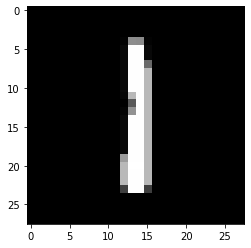

In [ ]:
plt.imshow(X[2], cmap='gray')

- 정답 데이터 원핫인코딩 하기
    - 다중 분류 모델에 학습시키기 위해
    - 이중 분류에서는 sigmoid를 사용해서(0.5보다 높으면 1, 아니면 0) 답이 0과 1로 구분되어있으므로 원핫인코딩 할 필요가 없음
    - 다중 분류에서는 각 클래스를 0 ~ 1값으로 맞춰줘야 제대로 된 학습이 가능
    - 모델이 학습하면서 0 ~ 1사이의 확률 정보를 통해 오차를 비교하여 학습하는데, 클래스값 그대로 학습에 사용한다면 높은 값일 수록 오차가 높아져 제대로 된 학습이 불가
    - 신경망 출력층에서 10개의 클래스 값들에 대한 확률 정보와 비교하여 같은 스케일로 오차를 구하기 위해

- pd.get_dummies : Pandas 에서 지원해주는 원핫인코딩 함수
- to_categorical : keras에서 지원해주는 원핫인코딩 함수

In [ ]:
from tensorflow.keras.utils import to_categorical

y_onehot = to_categorical(y)
y_onehot

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### 모델링
- 1. 모델 구조 설계

In [ ]:
model = Sequential()    # 뼈대 생성

model.add(InputLayer(input_shape=(28, 28))) # 입력층
model.add(Flatten())    # 데이터를 1차원으로 변형

model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))

model.add(Dense(units=10, activation='softmax')) # 출력층, 결과는 10개의 클래스에 대한 10개의 확률

- 2. 모델 컴파일
    - 모델의 학습 및 평가 방법 설정

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="SGD",
              metrics=['accuracy'])

- 3. 모델 학습

In [ ]:
history = model.fit(X, y_onehot, epochs=50, validation_split=0.2, batch_size=128)

Epoch 1/50
263/263 [==============================] - 6s 7ms/step - loss: 2.3046 - accuracy: 0.1243 - val_loss: 2.2796 - val_accuracy: 0.1685
Epoch 2/50
263/263 [==============================] - 1s 4ms/step - loss: 2.2702 - accuracy: 0.1967 - val_loss: 2.2578 - val_accuracy: 0.2064
Epoch 3/50
263/263 [==============================] - 1s 4ms/step - loss: 2.2475 - accuracy: 0.2702 - val_loss: 2.2339 - val_accuracy: 0.3475
Epoch 4/50
263/263 [==============================] - 1s 4ms/step - loss: 2.2223 - accuracy: 0.3634 - val_loss: 2.2067 - val_accuracy: 0.3670
Epoch 5/50
263/263 [==============================] - 1s 4ms/step - loss: 2.1928 - accuracy: 0.4287 - val_loss: 2.1739 - val_accuracy: 0.4349
Epoch 6/50
263/263 [==============================] - 1s 4ms/step - loss: 2.1565 - accuracy: 0.4576 - val_loss: 2.1328 - val_accuracy: 0.5761
Epoch 7/50
263/263 [==============================] - 1s 4ms/step - loss: 2.1103 - accuracy: 0.5337 - val_loss: 2.0796 - val_accuracy: 0.5261
Epoch 

- 학습 현황 시각화

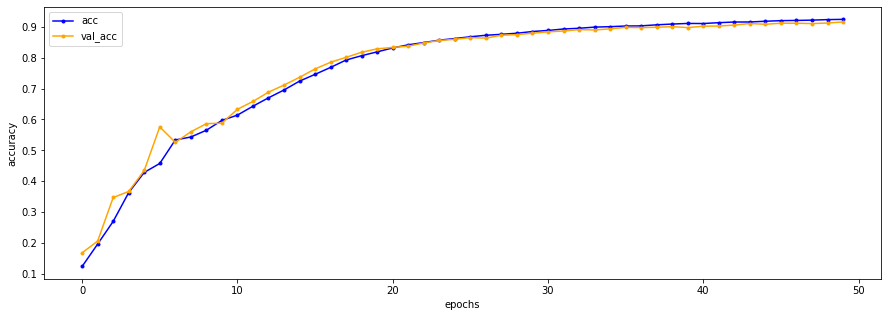

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='acc', c='blue', marker='.')
plt.plot(history.history['val_accuracy'], label='val_acc', c='orange', marker='.')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()